In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
# Inspecting first 5 rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Inspecting data types, column and row numbers, missing values etc...
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Inspecting row and column quantities of the data frame
insurance.shape

(1338, 7)

In [7]:
# Inspecting statistical values of the dataframe
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
# Inspecting if there is any null values in each column of the data frame
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

## Age

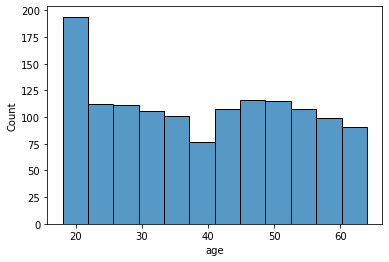

In [9]:
# Visualizing age counts for customers
sns.histplot(insurance['age'])
plt.show()

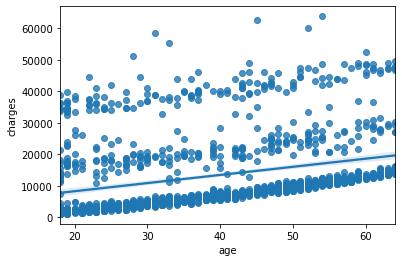

In [10]:
# Visualizing age vs. charges with a regression plot. It seems like age and cgarges have positive correlation
sns.regplot(x= 'age', y='charges', data = insurance)
plt.show()

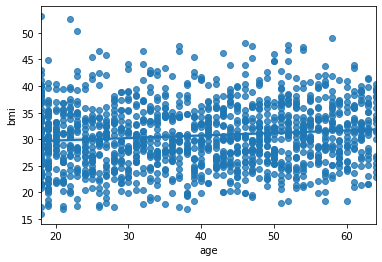

In [11]:
# Visualizing age vs. bmi with a regression plot. Unfortunatelly it does not tell much
sns.regplot(x= 'age', y='bmi', data = insurance)
plt.show()

## Sex

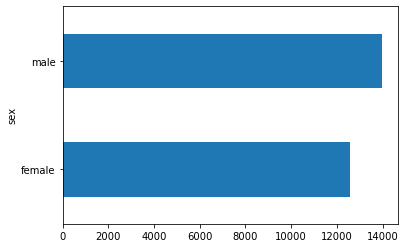

In [12]:
# Visualizing customers by sex vs charges by a horizontal bar plot
insurance.groupby('sex').charges.mean().plot(kind= 'barh')
plt.show()

## Children

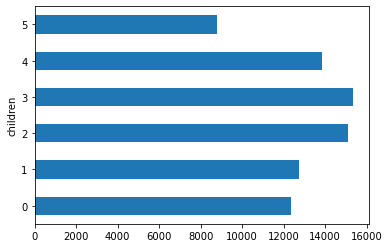

In [13]:
# Visualizing number of children that a customer have vs. the charges with a horizontal bar plot.
insurance.groupby('children').charges.mean().plot.barh()
plt.show()

## Smoker

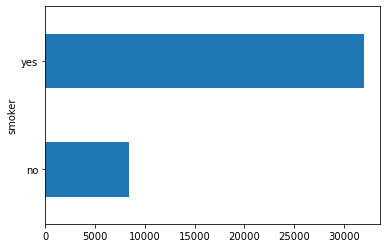

In [14]:
# Visualizing if the customer is a smoker and the charges they have to pay with a horizontal bar plot.
insurance.groupby('smoker').charges.mean().plot.barh()
plt.show()

## Region

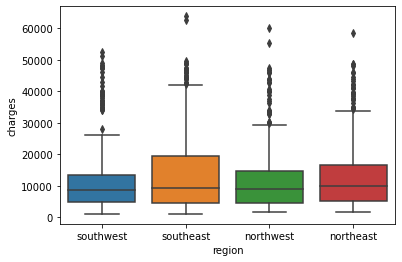

In [15]:
# Do charges vary by region? Visaulized with a box plot where we can see outliers.
sns.boxplot(x = 'region', y = 'charges', data = insurance)
plt.show()

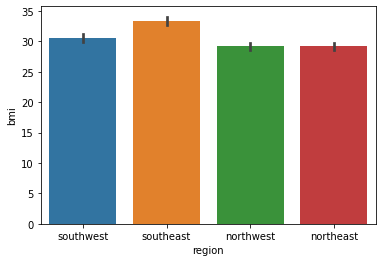

In [16]:
# Does bmi change as per region?
sns.barplot(x= 'region', y='bmi', data = insurance)
plt.show()

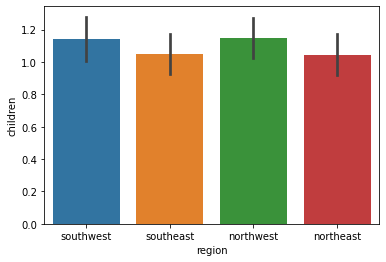

In [21]:
# Does the number of children vary as per region?
sns.barplot(x= 'region', y = 'children', data = insurance)
plt.show()

<AxesSubplot:>

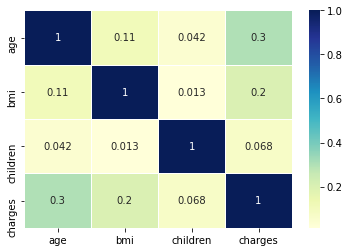

In [17]:
# What are the correlations between variables?
sns.heatmap(insurance.corr(), annot = True, cmap = "YlGnBu", cbar = True, linewidths = .5)

# Data modelling

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
# Creating feature values (X) and target value(y)
X = insurance[['age', 'bmi', 'children']]
y = insurance['charges']

In [23]:
# Splitting the data for train and test usage. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [24]:
# Creating a regressor
reg = LinearRegression()

In [25]:
# Fitting the model on train data. And calculating R2 score
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.11457378802682405

In [26]:
# We need to fit the model to test data to see how accurate it is with our train data.
reg.fit(X_test, y_test)
reg.score(X_test, y_test)

0.13537589857121113